# **FYP.24.s2.43p - SafeQR Project**



**About Dataset**

The original dataset is downloaded from https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset which consists of a huge dataset of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. The dataset only made up of URL and target class. We further process that data that did the following checks:


* number of redirections
* show the redirect chain
* show hsts headers a website use
* check for SSL stripping
* check for host name embedding (deceptive url)
* whether javascript present in url
* whether have shortening service
* whether url uses have ip address
* check for tracking mechanism
* check of URL encoding
* check for executables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Ensure that all rows are displayed
pd.set_option('display.max_rows', None)

# Ensure that all columns are displayed
pd.set_option('display.max_columns', None)

# Load the data
path = '/content/drive/MyDrive/Colab Notebooks/url_db_cleaned.csv'

data = pd.read_csv(path)

data.head()

Mounted at /content/drive


<ipython-input-2-2f803395ba41>:18: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,qr_code_type_id,contents,qr_code_id,created_at,result_category
0,famouswhy,people,com,{},NaN,0,/marguerite_churchill/,{https://people.famouswhy.com/marguerite_churc...,"{""No HSTS Header detected""}",{false},0,NaN,NaN,NaN,{},NaN,NaN,9,https://people.famouswhy.com/marguerite_church...,403ffba7-f30e-438b-af75-4f4aaa999377,2024-08-10 09:54:43.798 +0800,benign
1,charlotteobserver,events,com,{},NaN,0,/statesville-nc/events/jazz%2Bconcerts,{},{},{},0,NaN,NaN,NaN,{},Yes,NaN,9,https://events.charlotteobserver.com/statesvil...,9e5c7974-82aa-40b7-94a0-4fa7d49c1d79,2024-08-10 09:54:59.363 +0800,benign
2,wikia,icehockey,com,{},NaN,1,/wiki/Cory_Pecker,"{https://icehockey.wikia.com/wiki/Cory_Pecker,...","{""No HSTS Header detected"",""No HSTS Header det...","{false,false}",0,NaN,NaN,NaN,{},NaN,NaN,9,https://icehockey.wikia.com/wiki/Cory_Pecker,e8b37ba0-ffbb-4e1f-b77a-5617472ddfe9,2024-08-10 09:55:10.845 +0800,benign
3,vimeo,NaN,com,{},NaN,0,/9425680,{https://vimeo.com/9425680},"{""No HSTS Header detected""}",{false},0,NaN,NaN,NaN,{},NaN,NaN,9,https://vimeo.com/9425680,8e9c40e1-2a77-4da0-ac25-8384827c2b68,2024-08-10 09:55:11.564 +0800,benign
4,pensiiilfov,www,ro,"{view=article, id=77, Itemid=184, option=com_c...",NaN,0,/index.php,{http://www.pensiiilfov.ro/index.php?option=co...,"{""Not an HTTPS connection""}",{false},0,NaN,NaN,NaN,{},NaN,NaN,1,http://www.pensiiilfov.ro/index.php?option=com...,65cec661-0c54-42d4-9f80-e0486e8a7cfc,2024-08-10 09:55:11.512 +0800,defacement


**Data Cleaning**

In [ ]:
# Drop the 'qr_code_id' and 'created_at' columns
data = data.drop(columns=['qr_code_id', 'created_at'])

# Replace all NaN and None values with 0
data = data.fillna(0)

# Replace the string "{}" with 0
data = data.replace("{}", 0)

# Rename the 'qr_code_id' column to 'tls'
data = data.rename(columns={'qr_code_type_id': 'tls'})

# Rename the 'qr_code_id' column to 'tls'
data = data.rename(columns={'result_category': 'target'})

# Change the value in 'tls' column: 0 when value is 1, 1 when value is 9
data['tls'] = data['tls'].replace({1: 0, 9: 1})

# Display the first few rows to verify
data.head(20)

,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
0,famouswhy,people,com,0,0,0,/marguerite_churchill/,{https://people.famouswhy.com/marguerite_churc...,"{""No HSTS Header detected""}",{false},0,0,0,0,0,0,0,1,https://people.famouswhy.com/marguerite_church...,benign
1,charlotteobserver,events,com,0,0,0,/statesville-nc/events/jazz%2Bconcerts,0,0,0,0,0,0,0,0,Yes,0,1,https://events.charlotteobserver.com/statesvil...,benign
2,wikia,icehockey,com,0,0,1,/wiki/Cory_Pecker,"{https://icehockey.wikia.com/wiki/Cory_Pecker,...","{""No HSTS Header detected"",""No HSTS Header det...","{false,false}",0,0,0,0,0,0,0,1,https://icehockey.wikia.com/wiki/Cory_Pecker,benign
3,vimeo,0,com,0,0,0,/9425680,{https://vimeo.com/9425680},"{""No HSTS Header detected""}",{false},0,0,0,0,0,0,0,1,https://vimeo.com/9425680,benign
4,pensiiilfov,www,ro,"{view=article, id=77, Itemid=184, option=com_c...",0,0,/index.php,{http://www.pensiiilfov.ro/index.php?option=co...,"{""Not an HTTPS connection""}",{false},0,0,0,0,0,0,0,0,http://www.pensiiilfov.ro/index.php?option=com...,defacement
5,npr,0,org,0,0,0,/artists/134598784/seasick-steve,0,0,0,0,0,0,0,0,0,0,1,https://npr.org/artists/134598784/seasick-steve,benign
6,rottentomatoes,0,com,0,0,2,/celebrity/virna_lisi/,{https://rottentomatoes.com/celebrity/virna_li...,"{""HSTS Header: max-age=31536000 ; includeSubDo...","{false,false,false}",0,0,0,0,0,0,0,1,https://rottentomatoes.com/celebrity/virna_lisi/,benign
7,majorleagueumpires,0,com,0,0,0,/,{https://majorleagueumpires.com/},"{""No HSTS Header detected""}",{false},0,0,0,0,0,0,0,1,https://majorleagueumpires.com/,benign
8,ebay,0,com,{_nkw=wil%2Bwheaton},0,1,/sch/i.html,"{https://ebay.com/sch/i.html?_nkw=wil+wheaton,...","{""HSTS Header: max-age=31536000"",""HSTS Header:...","{false,false}",0,0,0,0,0,Yes,0,1,https://ebay.com/sch/i.html?_nkw=wil+wheaton,benign
9,spokeo,0,com,0,0,2,/Susan%2BMeldrum,"{https://spokeo.com/Susan+Meldrum,https://www....","{""No HSTS Header detected"",""HSTS Header: max-a...","{false,false,false}",0,0,0,0,0,Yes,0,1,https://spokeo.com/Susan+Meldrum,benign


In [ ]:
# List of columns to modify to 1
columns_to_modify = ['hostname_embedding', 'javascript_check', 'shortening_service',
                     'has_ip_address', 'url_encoding', 'has_executable',
                     'tracking_descriptions']

# Update the values: set to 1 if not already 0
for column in columns_to_modify:
    data[column] = data[column].apply(lambda x: 1 if x != 0 else 0)

# Convert 'ssl_stripping' column: set to 1 if the value is "true", else set to 0
data['ssl_stripping'] = data['ssl_stripping'].apply(lambda x: 1 if "true" in str(x).lower() else 0)


# Display the first few rows to verify changes
data.head(20)

,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
0,famouswhy,people,com,0,0,0,/marguerite_churchill/,{https://people.famouswhy.com/marguerite_churc...,"{""No HSTS Header detected""}",0,0,0,0,0,0,0,0,1,https://people.famouswhy.com/marguerite_church...,benign
1,charlotteobserver,events,com,0,0,0,/statesville-nc/events/jazz%2Bconcerts,0,0,0,0,0,0,0,0,1,0,1,https://events.charlotteobserver.com/statesvil...,benign
2,wikia,icehockey,com,0,0,1,/wiki/Cory_Pecker,"{https://icehockey.wikia.com/wiki/Cory_Pecker,...","{""No HSTS Header detected"",""No HSTS Header det...",0,0,0,0,0,0,0,0,1,https://icehockey.wikia.com/wiki/Cory_Pecker,benign
3,vimeo,0,com,0,0,0,/9425680,{https://vimeo.com/9425680},"{""No HSTS Header detected""}",0,0,0,0,0,0,0,0,1,https://vimeo.com/9425680,benign
4,pensiiilfov,www,ro,"{view=article, id=77, Itemid=184, option=com_c...",0,0,/index.php,{http://www.pensiiilfov.ro/index.php?option=co...,"{""Not an HTTPS connection""}",0,0,0,0,0,0,0,0,0,http://www.pensiiilfov.ro/index.php?option=com...,defacement
5,npr,0,org,0,0,0,/artists/134598784/seasick-steve,0,0,0,0,0,0,0,0,0,0,1,https://npr.org/artists/134598784/seasick-steve,benign
6,rottentomatoes,0,com,0,0,2,/celebrity/virna_lisi/,{https://rottentomatoes.com/celebrity/virna_li...,"{""HSTS Header: max-age=31536000 ; includeSubDo...",0,0,0,0,0,0,0,0,1,https://rottentomatoes.com/celebrity/virna_lisi/,benign
7,majorleagueumpires,0,com,0,0,0,/,{https://majorleagueumpires.com/},"{""No HSTS Header detected""}",0,0,0,0,0,0,0,0,1,https://majorleagueumpires.com/,benign
8,ebay,0,com,{_nkw=wil%2Bwheaton},0,1,/sch/i.html,"{https://ebay.com/sch/i.html?_nkw=wil+wheaton,...","{""HSTS Header: max-age=31536000"",""HSTS Header:...",0,0,0,0,0,0,1,0,1,https://ebay.com/sch/i.html?_nkw=wil+wheaton,benign
9,spokeo,0,com,0,0,2,/Susan%2BMeldrum,"{https://spokeo.com/Susan+Meldrum,https://www....","{""No HSTS Header detected"",""HSTS Header: max-a...",0,0,0,0,0,0,1,0,1,https://spokeo.com/Susan+Meldrum,benign


In [ ]:
import re

def process_hsts_header(value):
    # If the value is already 0, return 0
    if value == 0:
        return 0

    # Check if the value starts with '{' and ends with '}', indicating it's an array-like format
    if isinstance(value, str) and value.startswith("{") and value.endswith("}"):
        # Remove the curly braces and split the string by commas
        items = re.findall(r'\"(.*?)\"', value)

        # Check the first item in the parsed list
        if items and 'no' in items[0].lower():
            return 0
        else:
            return 1
    else:
        # If it's not in the expected format, return 0
        return 0

# Apply the function to the 'hsts_header' column
data['hsts_header'] = data['hsts_header'].apply(process_hsts_header)

# Display the first few rows to verify the changes
data.head(20)


,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
0,famouswhy,people,com,0,0,0,/marguerite_churchill/,{https://people.famouswhy.com/marguerite_churc...,0,0,0,0,0,0,0,0,0,1,https://people.famouswhy.com/marguerite_church...,benign
1,charlotteobserver,events,com,0,0,0,/statesville-nc/events/jazz%2Bconcerts,0,0,0,0,0,0,0,0,1,0,1,https://events.charlotteobserver.com/statesvil...,benign
2,wikia,icehockey,com,0,0,1,/wiki/Cory_Pecker,"{https://icehockey.wikia.com/wiki/Cory_Pecker,...",0,0,0,0,0,0,0,0,0,1,https://icehockey.wikia.com/wiki/Cory_Pecker,benign
3,vimeo,0,com,0,0,0,/9425680,{https://vimeo.com/9425680},0,0,0,0,0,0,0,0,0,1,https://vimeo.com/9425680,benign
4,pensiiilfov,www,ro,"{view=article, id=77, Itemid=184, option=com_c...",0,0,/index.php,{http://www.pensiiilfov.ro/index.php?option=co...,0,0,0,0,0,0,0,0,0,0,http://www.pensiiilfov.ro/index.php?option=com...,defacement
5,npr,0,org,0,0,0,/artists/134598784/seasick-steve,0,0,0,0,0,0,0,0,0,0,1,https://npr.org/artists/134598784/seasick-steve,benign
6,rottentomatoes,0,com,0,0,2,/celebrity/virna_lisi/,{https://rottentomatoes.com/celebrity/virna_li...,1,0,0,0,0,0,0,0,0,1,https://rottentomatoes.com/celebrity/virna_lisi/,benign
7,majorleagueumpires,0,com,0,0,0,/,{https://majorleagueumpires.com/},0,0,0,0,0,0,0,0,0,1,https://majorleagueumpires.com/,benign
8,ebay,0,com,{_nkw=wil%2Bwheaton},0,1,/sch/i.html,"{https://ebay.com/sch/i.html?_nkw=wil+wheaton,...",1,0,0,0,0,0,0,1,0,1,https://ebay.com/sch/i.html?_nkw=wil+wheaton,benign
9,spokeo,0,com,0,0,2,/Susan%2BMeldrum,"{https://spokeo.com/Susan+Meldrum,https://www....",0,0,0,0,0,0,0,1,0,1,https://spokeo.com/Susan+Meldrum,benign


In [ ]:
# List of columns to convert to number of characters
columns_to_convert = ['domain', 'top_level_domain', 'subdomain', 'query',
                      'fragment', 'path', 'redirect_chain', 'contents']

# Apply len() function to each of the specified columns to get the number of characters
for column in columns_to_convert:
    data[column] = data[column].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Map the target class to numerical values
target_mapping = {
    'benign': 0,
    'defacement': 1,
    'malware': 2,
    'phishing': 3
}

data['target'] = data['target'].replace(target_mapping)

# Display the first few rows to verify the changes
data.head()

,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
0,9,6,3,1,1,0,22,52,0,0,0,0,0,0,0,0,0,1,50,0
1,17,6,3,1,1,0,38,1,0,0,0,0,0,0,0,1,0,1,72,0
2,5,9,3,1,1,1,17,92,0,0,0,0,0,0,0,0,0,1,44,0
3,5,1,3,1,1,0,8,27,0,0,0,0,0,0,0,0,0,1,25,0
4,11,3,2,53,1,0,10,86,0,0,0,0,0,0,0,0,0,0,84,1


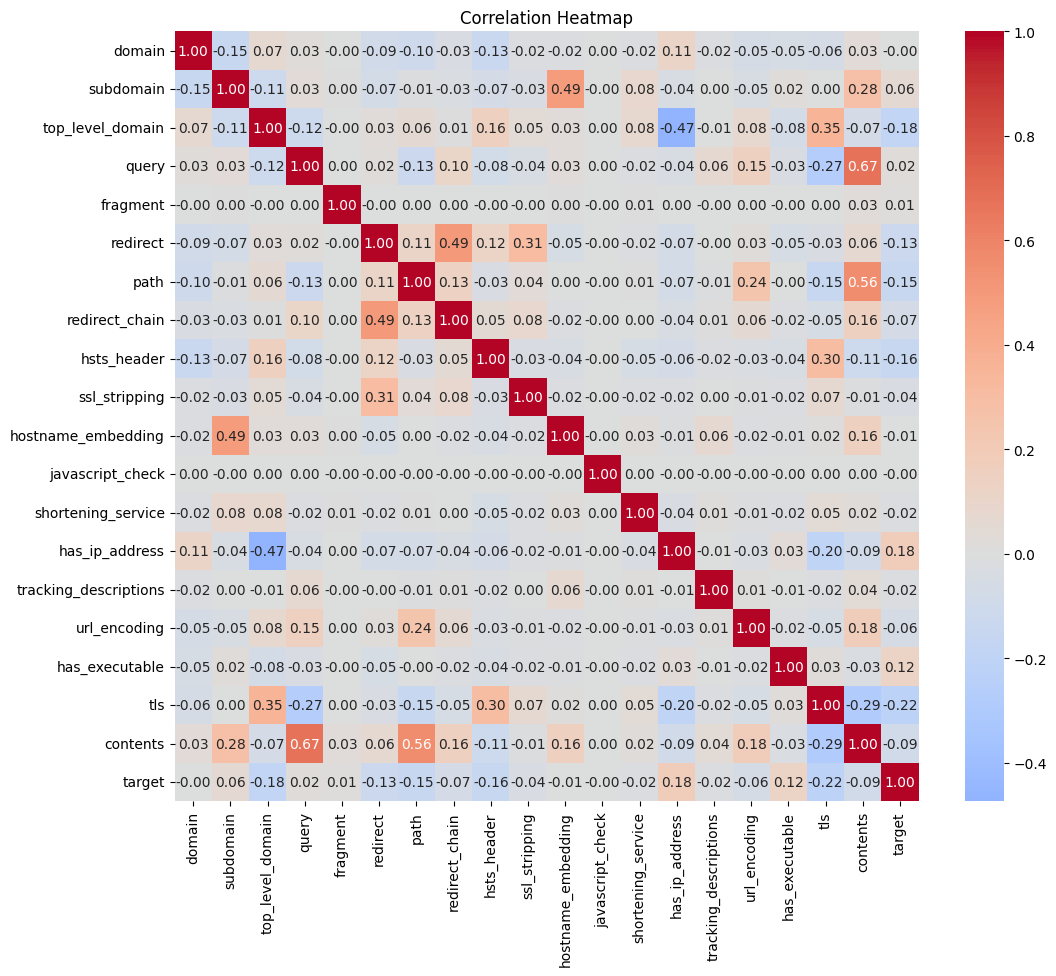

,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
domain,1.000000,-0.149618,0.070517,0.025251,-0.001999,-0.091271,-0.103002,-0.032532,-0.132035,-0.020964,-0.016897,0.000905,-0.016502,0.109330,-0.020126,-0.054941,-0.051782,-0.057589,0.034923,-0.004340
subdomain,-0.149618,1.000000,-0.109429,0.033378,0.004213,-0.074009,-0.008929,-0.025925,-0.069056,-0.031019,0.489992,-0.000740,0.080844,-0.042574,0.002598,-0.046689,0.023112,0.001871,0.276423,0.058300
top_level_domain,0.070517,-0.109429,1.000000,-0.116257,-0.001123,0.029653,0.060649,0.007279,0.156154,0.045547,0.029927,0.001463,0.075501,-0.474097,-0.007049,0.075147,-0.076408,0.350973,-0.069449,-0.183335
query,0.025251,0.033378,-0.116257,1.000000,0.000368,0.019897,-0.125852,0.102771,-0.079392,-0.037063,0.031424,0.003336,-0.016585,-0.042096,0.063684,0.148184,-0.033489,-0.265888,0.673632,0.018143
fragment,-0.001999,0.004213,-0.001123,0.000368,1.000000,-0.002871,0.002008,0.002674,-0.003584,-0.001408,0.004069,-0.000034,0.009304,0.001973,-0.000554,0.001837,-0.001020,0.000983,0.030370,0.014667
redirect,-0.091271,-0.074009,0.029653,0.019897,-0.002871,1.000000,0.110208,0.493915,0.124105,0.312038,-0.048606,-0.001758,-0.019225,-0.072290,-0.003036,0.025532,-0.050106,-0.034452,0.062467,-0.125495
path,-0.103002,-0.008929,0.060649,-0.125852,0.002008,0.110208,1.000000,0.132329,-0.034376,0.035940,0.003492,-0.001263,0.009201,-0.071098,-0.010602,0.244904,-0.002244,-0.146011,0.561191,-0.149450
redirect_chain,-0.032532,-0.025925,0.007279,0.102771,0.002674,0.493915,0.132329,1.000000,0.052521,0.079979,-0.024769,-0.000991,0.002580,-0.038346,0.005351,0.057792,-0.023774,-0.050487,0.157086,-0.065771
hsts_header,-0.132035,-0.069056,0.156154,-0.079392,-0.003584,0.124105,-0.034376,0.052521,1.000000,-0.033615,-0.041312,-0.001456,-0.048528,-0.061468,-0.020496,-0.028736,-0.042739,0.298860,-0.113300,-0.157230
ssl_stripping,-0.020964,-0.031019,0.045547,-0.037063,-0.001408,0.312038,0.035940,0.079979,-0.033615,1.000000,-0.015376,-0.000543,-0.016078,-0.023061,0.000566,-0.009352,-0.016072,0.065977,-0.012553,-0.035747


In [ ]:
# Copy the data to avoid modifying the original DataFrame
data_encoded = data.copy()

# Encode categorical variables with integer encoding
for column in data_encoded.select_dtypes(include=['object', 'category']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr(method='pearson')

# Sort correlations in descending order
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False, key=abs)

# Remove duplicate correlations and self-correlations
sorted_correlations = sorted_correlations[(sorted_correlations < 1) &
                                          (sorted_correlations > -1)].drop_duplicates()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display sorted correlations with background gradient (optional)
styled_correlations = correlation_matrix.style.background_gradient(cmap='coolwarm')
styled_correlations


In [ ]:
# Copy the data to avoid modifying the original DataFrame
data_encoded = data.copy()

# Encode categorical variables with integer encoding
for column in data_encoded.select_dtypes(include=['object', 'category']).columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr(method='pearson')

# Extract correlations with the target class
target_correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False, key=abs)

# Display correlations with the target class
print("Correlations with the target class in descending order:")
print(target_correlations)

Correlations with the target class in descending order:
tls                     -0.217785
top_level_domain        -0.183335
has_ip_address           0.175486
hsts_header             -0.157230
path                    -0.149450
redirect                -0.125495
has_executable           0.121012
contents                -0.086009
redirect_chain          -0.065771
subdomain                0.058300
url_encoding            -0.056759
ssl_stripping           -0.035747
tracking_descriptions   -0.021144
shortening_service      -0.018505
query                    0.018143
fragment                 0.014667
hostname_embedding      -0.006299
domain                  -0.004340
javascript_check        -0.002031
Name: target, dtype: float64


**Use stratified sampling to select 80% data for training and 20% for testing.**



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the stratified shuffle split
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

# Separate the features and target
X = data.drop(columns=['target'])
y = data['target']

# Perform the split
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Combine X and y for training and testing sets
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test

# Display the number of samples in each set to verify
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

# Display the first few rows of the training set
train_data.head()


Training set size: 485667
Testing set size: 161889


,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
270120,15,1,3,1,1,0,16,1,0,0,0,0,0,0,0,0,0,1,43,0
158380,10,3,2,1,1,1,20,92,0,0,0,0,0,0,0,0,0,0,44,1
410696,12,1,3,1,1,3,29,356,0,0,0,0,0,0,0,0,0,1,53,0
206227,4,5,3,1,1,1,13,83,0,0,0,0,0,0,0,0,0,1,35,3
76878,5,1,3,1,1,2,17,113,0,1,0,0,0,0,0,0,0,1,34,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485667 entries, 270120 to 216243
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   domain                 485667 non-null  int64
 1   subdomain              485667 non-null  int64
 2   top_level_domain       485667 non-null  int64
 3   query                  485667 non-null  int64
 4   fragment               485667 non-null  int64
 5   redirect               485667 non-null  int64
 6   path                   485667 non-null  int64
 7   redirect_chain         485667 non-null  int64
 8   hsts_header            485667 non-null  int64
 9   ssl_stripping          485667 non-null  int64
 10  hostname_embedding     485667 non-null  int64
 11  javascript_check       485667 non-null  int64
 12  shortening_service     485667 non-null  int64
 13  has_ip_address         485667 non-null  int64
 14  tracking_descriptions  485667 non-null  int64
 15  url_encoding     

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161889 entries, 262506 to 281817
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   domain                 161889 non-null  int64
 1   subdomain              161889 non-null  int64
 2   top_level_domain       161889 non-null  int64
 3   query                  161889 non-null  int64
 4   fragment               161889 non-null  int64
 5   redirect               161889 non-null  int64
 6   path                   161889 non-null  int64
 7   redirect_chain         161889 non-null  int64
 8   hsts_header            161889 non-null  int64
 9   ssl_stripping          161889 non-null  int64
 10  hostname_embedding     161889 non-null  int64
 11  javascript_check       161889 non-null  int64
 12  shortening_service     161889 non-null  int64
 13  has_ip_address         161889 non-null  int64
 14  tracking_descriptions  161889 non-null  int64
 15  url_encoding     

In [ ]:
train_data.describe(include='all')

,domain,subdomain,top_level_domain,query,fragment,redirect,path,redirect_chain,hsts_header,ssl_stripping,hostname_embedding,javascript_check,shortening_service,has_ip_address,tracking_descriptions,url_encoding,has_executable,tls,contents,target
count,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000,485667.000000
mean,9.348127,4.363529,2.772908,12.765531,1.012014,0.538027,29.757869,84.199075,0.164016,0.026444,0.008646,0.000006,0.061052,0.019419,0.002753,0.055046,0.009496,0.687399,64.732677,0.663722
std,4.975088,10.547273,0.509683,34.268056,1.179588,1.011421,31.774638,280.354627,0.370290,0.160452,0.092580,0.002485,0.239426,0.137991,0.052396,0.228070,0.096985,0.463554,40.343858,1.074267
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,6.000000,1.000000,3.000000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000
50%,9.000000,1.000000,3.000000,1.000000,1.000000,0.000000,21.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,53.000000,0.000000
75%,12.000000,3.000000,3.000000,1.000000,1.000000,1.000000,40.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,81.000000,1.000000
max,63.000000,242.000000,13.000000,2441.000000,494.000000,20.000000,2156.000000,32498.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2183.000000,3.000000


In [ ]:
# Verify the split
print("Training set size:", len(train_data))
print(train_data['target'].value_counts())

print("Testing set size:", len(test_data))
print(test_data['target'].value_counts())

Training set size: 485667
target
0    322156
1     71879
3     67205
2     24427
Name: count, dtype: int64
Testing set size: 161889
target
0    107386
1     23959
3     22401
2      8143
Name: count, dtype: int64


**Define Function to print Model Evaluation**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(y_test, y_pred):
    target_mapping = {0: "Benign", 1: "Defacement", 2: "Malware", 3: "Phishing"}

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on test set:", accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=list(target_mapping.keys()))

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(target_mapping.values()),
                yticklabels=list(target_mapping.values()))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Generate and print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=list(target_mapping.values())))

# Example usage:
# evaluate_model(y_test, y_pred)


**Random Forest Classifier**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'rf__max_depth': 15, 'rf__n_estimators': 100}
Accuracy on test set: 0.903415303078035


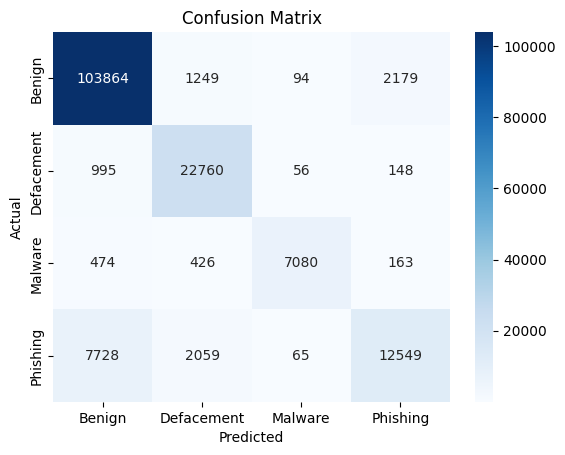

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.97      0.94    107386
  Defacement       0.86      0.95      0.90     23959
     Malware       0.97      0.87      0.92      8143
    Phishing       0.83      0.56      0.67     22401

    accuracy                           0.90    161889
   macro avg       0.90      0.84      0.86    161889
weighted avg       0.90      0.90      0.90    161889



In [ ]:
from math import e
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Step 1: Create a pipeline with MinMaxScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling with MinMaxScaler
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Step 2: Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [15]
}

# Step 3: Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Step 6: Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate Model
evaluate_model(y_test, y_pred)

# **Save Model for Deployment**

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, '/content/drive/MyDrive/random_forest_model.pkl')

['/content/drive/MyDrive/random_forest_model.pkl']

**Multinomial Naive Bayes**

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'nb__alpha': 0.1}
Accuracy on test set: 0.6897503845227285


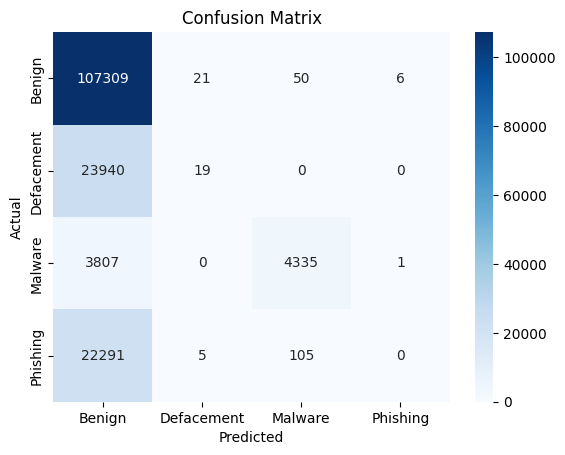

Classification Report:
              precision    recall  f1-score   support

      Benign       0.68      1.00      0.81    107386
  Defacement       0.42      0.00      0.00     23959
     Malware       0.97      0.53      0.69      8143
    Phishing       0.00      0.00      0.00     22401

    accuracy                           0.69    161889
   macro avg       0.52      0.38      0.37    161889
weighted avg       0.56      0.69      0.57    161889



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Step 1: Create a pipeline with MinMaxScaler and MultinomialNB
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling with MinMaxScaler
    ('nb', MultinomialNB())  # Naive Bayes classifier
])

# Step 2: Define the parameter grid for GridSearchCV
# Naive Bayes doesn't have as many parameters as RandomForest, so the grid is smaller
param_grid = {
    'nb__alpha': [0.1, 1.0, 10.0]  # Smoothing parameter
}

# Step 3: Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Step 6: Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate Model
evaluate_model(y_test, y_pred)


**XGBoost (eXtreme Gradient Boosting)**



Accuracy on test set: 0.9136815966495562


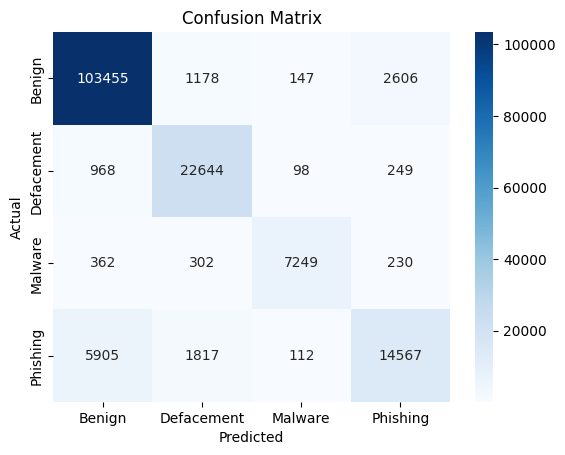

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.95    107386
  Defacement       0.87      0.95      0.91     23959
     Malware       0.95      0.89      0.92      8143
    Phishing       0.83      0.65      0.73     22401

    accuracy                           0.91    161889
   macro avg       0.90      0.86      0.88    161889
weighted avg       0.91      0.91      0.91    161889



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2}
Accuracy on test set: 0.9327749260295635


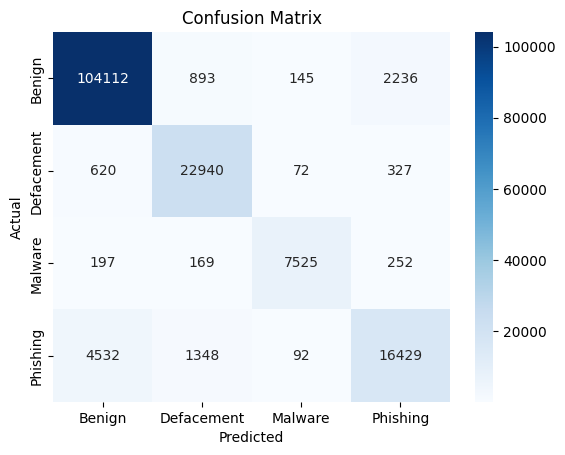

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96    107386
  Defacement       0.90      0.96      0.93     23959
     Malware       0.96      0.92      0.94      8143
    Phishing       0.85      0.73      0.79     22401

    accuracy                           0.93    161889
   macro avg       0.92      0.90      0.91    161889
weighted avg       0.93      0.93      0.93    161889



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.2]
}

randomized_search = RandomizedSearchCV(
    model, param_distributions, n_iter=8, scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1
)

randomized_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", randomized_search.best_params_)

# Evaluate the best model
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test)
evaluate_model(y_test, y_pred)


In [ ]:
import joblib
# Save the model
joblib.dump(best_model, '/content/drive/MyDrive/randomized_search_xgb_model-2.pkl')

['/content/drive/MyDrive/randomized_search_xgb_model-2.pkl']

**Multilayer Perceptron Classifier**

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
Accuracy on test set: 0.8830186115177684


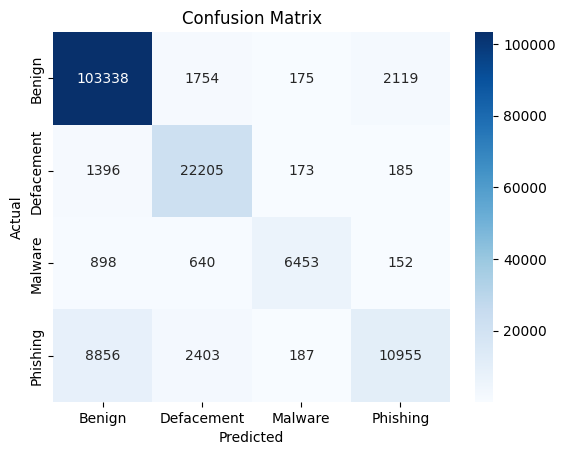

Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.96      0.93    107386
  Defacement       0.82      0.93      0.87     23959
     Malware       0.92      0.79      0.85      8143
    Phishing       0.82      0.49      0.61     22401

    accuracy                           0.88    161889
   macro avg       0.87      0.79      0.82    161889
weighted avg       0.88      0.88      0.87    161889



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', MLPClassifier(random_state=42, max_iter=300))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['relu'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [0.0001],
    'mlp__learning_rate': ['constant']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

evaluate_model(y_test, y_pred)
